<a href="https://colab.research.google.com/github/steve-shim/dlgom/blob/main/opencv/%EB%A1%9C%EA%B3%A0%EC%82%BD%EC%9E%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/dataset/images'
fn = 'logo.jpg'
#data = pd.read_excel(os.path.join(path, fn))

In [ ]:
os.path.join(path, 'logo.jpg')

'/content/drive/MyDrive/Colab Notebooks/dataset/images/logo.jpg'

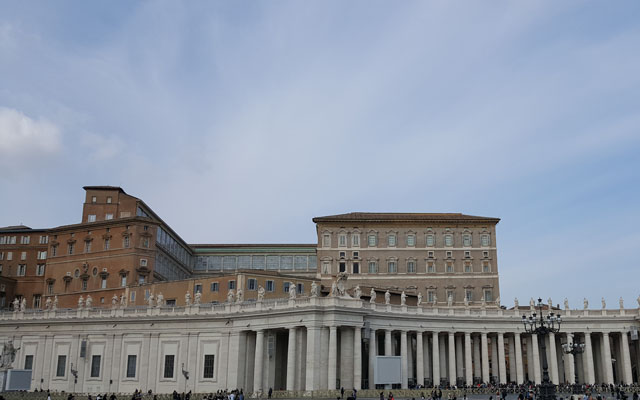

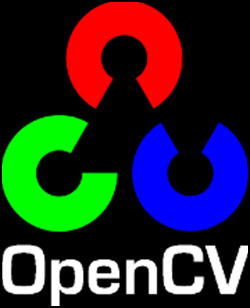

In [ ]:
import numpy as np
import cv2

image = cv2.imread(os.path.join(path, 'bit_test.jpg'), cv2.IMREAD_COLOR)     # 원본 영상 읽기
cv2_imshow(image) 
logo  = cv2.imread(os.path.join(path, 'logo.jpg'), cv2.IMREAD_COLOR)    # 로고 영상 읽기
if image is None or logo is None: raise Exception("영상 파일 읽기 오류 ")
cv2_imshow(logo)
print("logo",logo.shape) # (308, 250, 3)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

masks[0] -> Blue


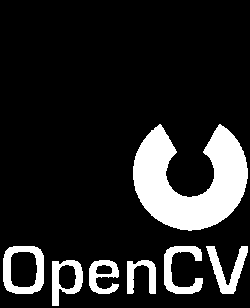

masks[1] -> Green


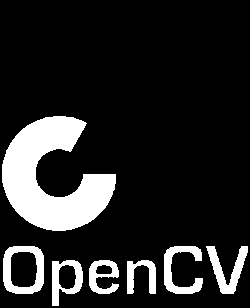

masks[2] -> Red


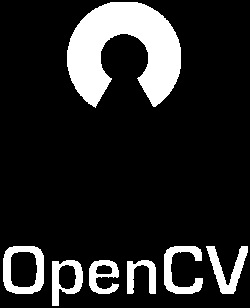

In [ ]:
masks = cv2.threshold(logo, 220, 255, cv2.THRESH_BINARY)[1]  # 로고 영상 이진화
masks = cv2.split(masks)
print("masks[0] -> Blue")
cv2_imshow(masks[0])
print("masks[1] -> Green")  
cv2_imshow(masks[1])
print("masks[2] -> Red")  
cv2_imshow(masks[2])  

fg_pass_mask


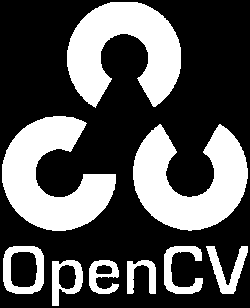

bg_pass_mask


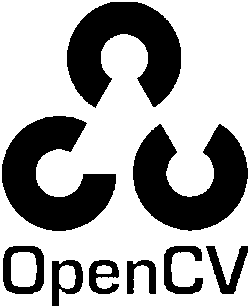

In [ ]:
fg_pass_mask = cv2.bitwise_or(masks[0], masks[1])       # 전경 통과 마스크
fg_pass_mask = cv2.bitwise_or(masks[2], fg_pass_mask)
print("fg_pass_mask")
cv2_imshow(fg_pass_mask)  
print("bg_pass_mask")
bg_pass_mask = cv2.bitwise_not(fg_pass_mask)            # 배경 통과 마스크
cv2_imshow(bg_pass_mask)

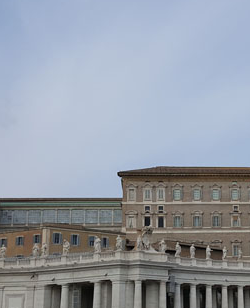

In [ ]:
(H, W), (h, w) = image.shape[:2], logo.shape[:2]  # 로고 영상 크기 
x, y = (W-w)//2, (H - h)//2                       # 시작좌표 구하기 (195,46)
roi = image[y:y+h, x:x+w]                         # 관심 영역(roi) 지정
cv2_imshow(roi)

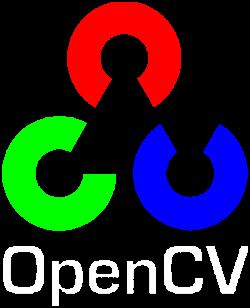

foreground (308, 250, 3)


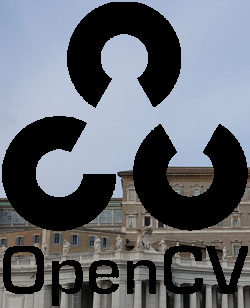

background (308, 250, 3)


In [ ]:
# 행렬 논리곱과 마스킹을 이용한 관심 영역 복사
foreground = cv2.bitwise_and(logo, logo, mask=fg_pass_mask) # 로고의 전경 복사
cv2_imshow(foreground) # (308, 250, 3)
print("foreground",foreground.shape)
background = cv2.bitwise_and(roi , roi , mask=bg_pass_mask) # roi에 원본배경만 복사
cv2_imshow(background)
print("background",background.shape) # (308, 250, 3)

dst (308, 250, 3)
background


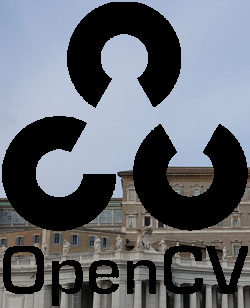

forground


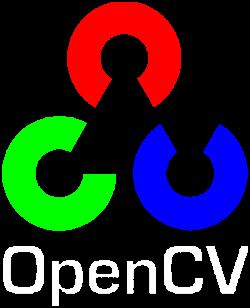

dst


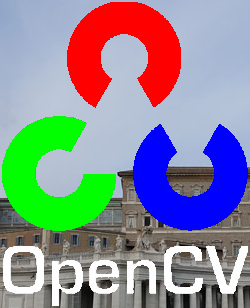

image


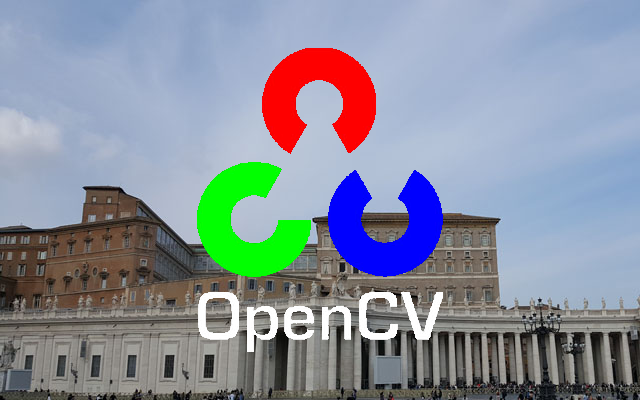

In [ ]:
dst = cv2.add(background, foreground) # 로고 전경과 원본 배경 간 합성
# print("dst",dst.shape) # (308, 250, 3)
image[y:y+h, x:x+w] = dst             # 합성 영상을 원본에 복사

print("background")
cv2_imshow(background)
print("forground")
cv2_imshow(foreground)
print("dst")
cv2_imshow(dst)
print("image")                
cv2_imshow(image)
